In [70]:
import pandas as pd
import numpy as np
import glob
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

import importlib

root_dir = '/oak/stanford/groups/horence/rob/isoform_localizations/'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [2]:
spots = pd.read_csv('../processed_data/all_passing_rna_spots.csv')
cells = pd.read_csv('../processed_data/segmented_cell_shapes.csv')

In [74]:
cells.shape

(362961, 5)

In [75]:
sub_cells = cells.sample(1000)
sub_spots = spots[spots['cell_id'].isin(sub_cells['cell_id'])]
sub_cells = cells[cells['cell_id'].isin(sub_spots['cell_id'])]
sub_cells['cell_id'].unique().size

699

In [76]:
importlib.reload(spatial_utils)
x = spatial_utils.spatial_metric_periphery(sub_spots,sub_cells)
x.head()

,cell_id,target_molecule_name,num_cell_spots,num_gene_spots,metric_name,raw_metric,cell_zscore,gene_median_cell_zscore,gene_var_cell_zscore
0,10021303523257862278464342827804406136,5730522E02Rik,136,1,periphery,2.679732,2.282739,0.864078,2.093049
1,10021303523257862278464342827804406136,Acta2,136,1,periphery,0.566504,-1.049578,-0.196847,1.478511
2,10021303523257862278464342827804406136,Adamts2,136,1,periphery,1.117913,-0.180069,0.240956,1.458492
3,10021303523257862278464342827804406136,Aqp4,136,4,periphery,1.549578,0.500617,-0.367254,1.909553
4,10021303523257862278464342827804406136,Bmpr1b,136,3,periphery,2.119518,1.399347,0.096382,1.631980


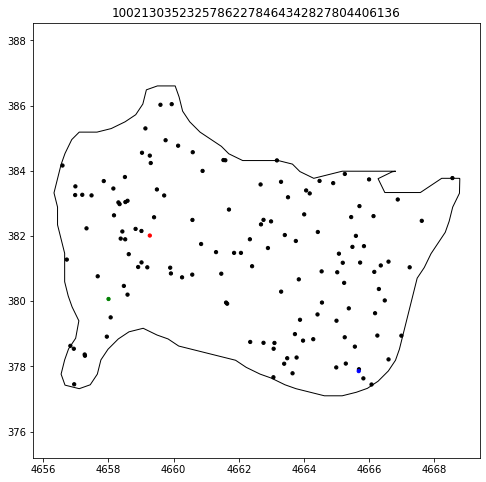

In [80]:


cell_id = '10021303523257862278464342827804406136'
spot_colors = {
    '5730522E02Rik':'r',
    'Acta2':'b',
    'Adamts2':'g',
}

plot_cells = sub_cells[sub_cells['cell_id'].eq(cell_id)]
plot_spots = sub_spots[sub_spots['cell_id'].eq(cell_id)]
plot_utils.plot_spot_cells(plot_spots,plot_cells,spot_colors)